# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import *

In [2]:
df = pd.read_csv("BlackFriday.csv", dtype={'Product_Category_1': 'object','Product_Category_2': 'object','Product_Category_3': 'object', 'Occupation': 'object'})
df_og = pd.read_csv("BlackFriday.csv", dtype={'Product_Category_1': 'object','Product_Category_2': 'object','Product_Category_3': 'object', 'Occupation': 'object'})

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df["Stay_In_Current_City_Years"] = df['Stay_In_Current_City_Years'].astype('object')

# Exploratory Analysis (Visualization)

C:\Users\DishantBhatt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


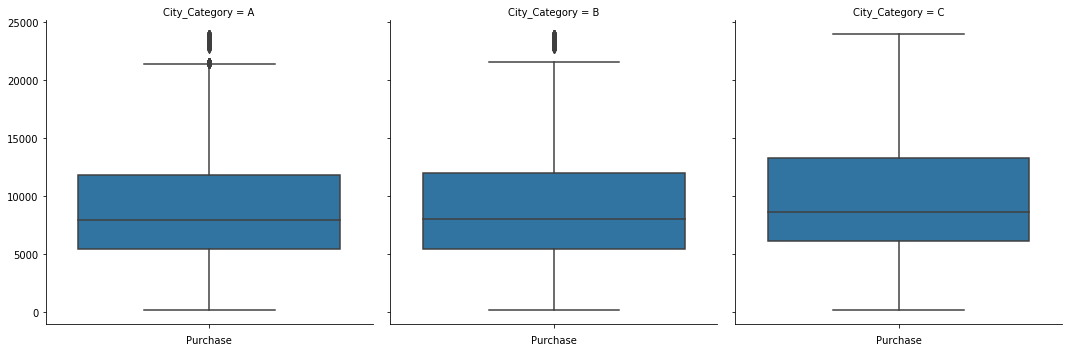

In [5]:
df.sort_values('City_Category', inplace=True)
g = sns.FacetGrid(df, col = "City_Category", height= 5)
g.map(sns.boxplot, "Purchase", orient = 'v')


In [6]:
df_by_occupation = df.groupby("Occupation").mean().reset_index()
df_by_occupation.head()

,Occupation,User_ID,Marital_Status,Purchase
0,0,1.002964e+06,0.417733,9186.946726
1,1,1.003298e+06,0.476518,9017.703095
2,10,1.002460e+06,0.057910,9052.836410
3,11,1.002781e+06,0.382872,9299.467190
4,12,1.002882e+06,0.467245,9883.052460


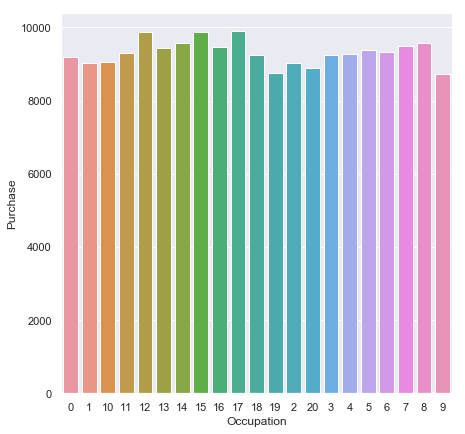

In [7]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x = 'Occupation', y = 'Purchase', data= df_by_occupation.sort_values('Occupation'), orient = 'v')

In [8]:
occupation_avg_pur = df.groupby('Occupation').agg({'Purchase': 'mean'}).reset_index().sort_values(
    'Purchase', ascending = False)
occupation_avg_pur

,Occupation,Purchase
9,17,9906.378997
4,12,9883.052460
7,15,9866.239925
19,8,9576.508530
6,14,9568.536426
18,7,9502.175276
8,16,9457.133118
5,13,9424.449391
16,5,9388.848978
17,6,9336.378620


In [9]:
df['Age'] = df['Age'].astype('str')
df['Age'].replace({'0-17': 'Age Group 1', '18-25': 'Age Group 2', '26-35': 'Age Group 3', '36-45': 'Age Group 3',
                  '46-50':'Age Group 3', '51-55': 'Age Group 4', '55+':'Age Group 4'}, inplace = True)

C:\Users\DishantBhatt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


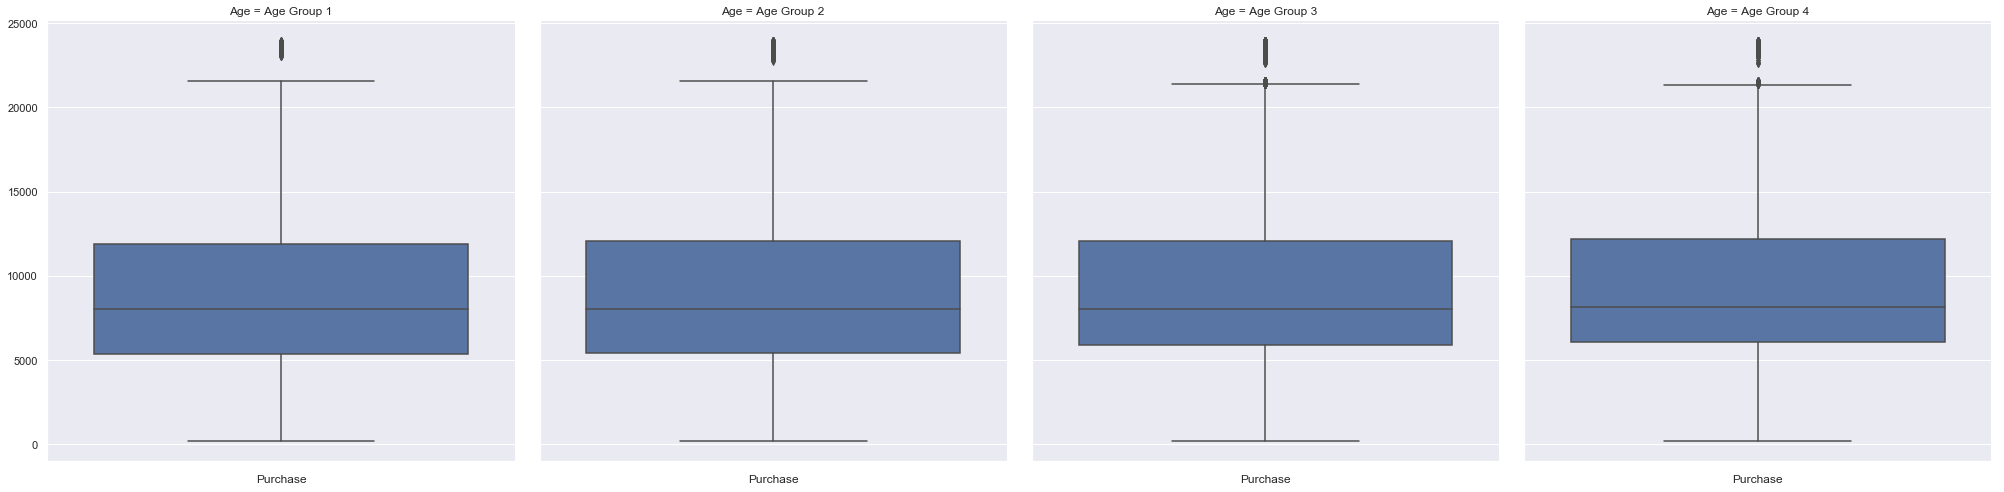

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.FacetGrid(data= df.sort_values('Age'), col = 'Age', height = 7).map(sns.boxplot, 'Purchase', orient = 'v')

C:\Users\DishantBhatt\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


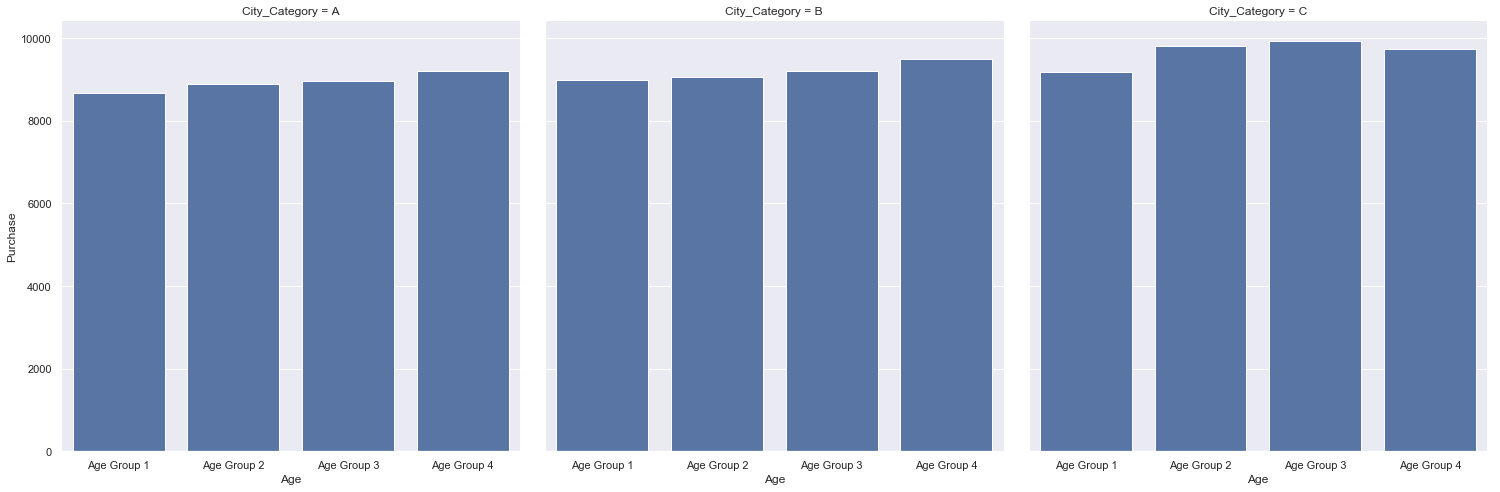

In [23]:
df_age = df.groupby(['Age', 'City_Category']).agg({'Purchase': 'mean'}).reset_index()
sns.FacetGrid(data = df_age.sort_values('Age'), col = 'City_Category', height = 7).map(
        sns.barplot, 'Age', 'Purchase'
)

In [11]:
df_by_stayyears = df_og.groupby('Stay_In_Current_City_Years').mean().reset_index()
df_by_stayyears

,Stay_In_Current_City_Years,User_ID,Marital_Status,Purchase
0,0,1.003020e+06,0.396136,9247.238625
1,1,1.003036e+06,0.427370,9319.865095
2,2,1.003060e+06,0.402578,9397.607316
3,3,1.002877e+06,0.394815,9350.685121
4,4+,1.002913e+06,0.400717,9346.370158


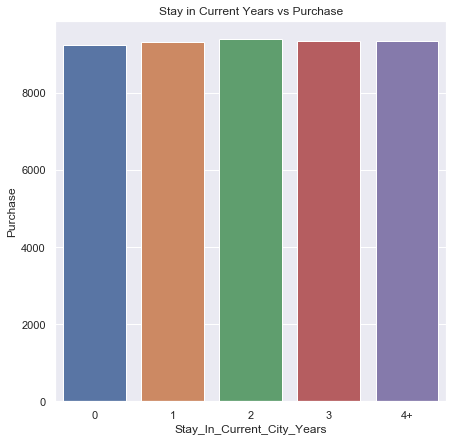

In [12]:
sns.set(rc={'figure.figsize':(7,7)})
plot = sns.barplot(x = 'Stay_In_Current_City_Years', y = 'Purchase', data = df_by_stayyears)
plot.set_title("Stay in Current Years vs Purchase")
plot

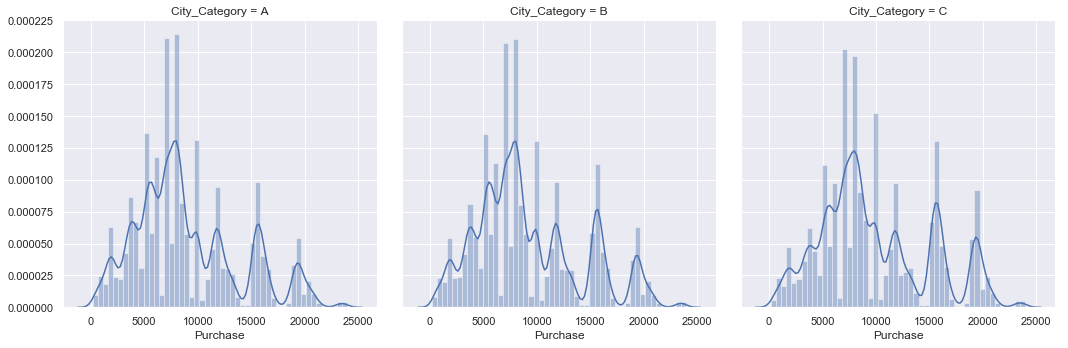

In [13]:
g = sns.FacetGrid(df, col = "City_Category", height= 5)
g.map(sns.distplot, "Purchase")

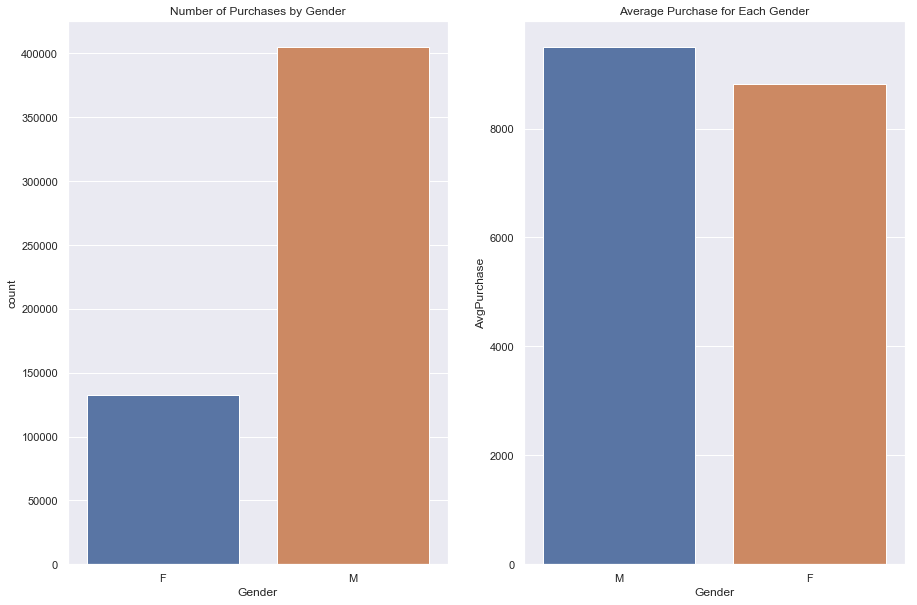

In [14]:
gender_pur = df.groupby('Gender').agg({'Purchase':'mean'}).reset_index().rename(
    columns = {'Purchase':'AvgPurchase'}).sort_values('Gender', ascending = False)

fig, axs = plt.subplots(ncols=2, figsize = (15,10))
axs[0].set_title('Number of Purchases by Gender')
axs[1].set_title('Average Purchase for Each Gender')
sns.countplot(df['Gender'], ax = axs[0])
sns.barplot(x = 'Gender', y = 'AvgPurchase', data = gender_pur, ax = axs[1])


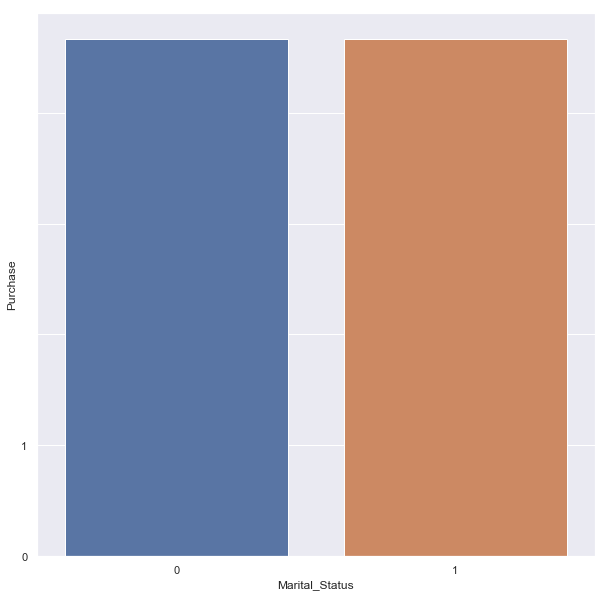

In [33]:
df_mar = df.groupby(['Marital_Status']).mean().reset_index()

fig, axs = plt.subplots(figsize = (10,10))
axs.set_yticklabels(df_mar['Marital_Status'], minor=False)
sns.barplot(x= 'Marital_Status', y = 'Purchase', data = df_mar, ax= axs )

# Exploratory Analysis (Stats)

In [34]:
import researchpy as rp
from scipy import stats

In [44]:
df_F = df[df.Gender == 'F']
df_M = df[df.Gender == 'M']

print(stats.levene(df_F.Purchase, df_M.Purchase))


LeveneResult(statistic=1850.2529347343086, pvalue=0.0)


In [43]:
s, p = stats.ttest_ind(df_M.Purchase, df_F.Purchase, equal_var= False)
p

0.0

# 20/80 Rule

<h4> The 20/80 rule when applied to marketing/sales implies that 20% of consumers are responsible for 80% of the sales. </h4> 
<p> I want to see if this trend applies to this dataset. I want to take a look at the top twenty percent of consumers and find out what portion of sales they make up. </p>

We will look at this with sales as a whole and then by city (Cities A & B have numerous outliers it might be beneficial to look at them seperately).

First lets take a look at the box plot for overall sales. Then we will:
<ol>
    <li> Get 20% of the top consumers and find out how much money they spent. </li>
    <li> Determine what percent of total sales the top 20 make up. </li>
    </ol>
   

In [ ]:
sns.boxplot(x = 'Purchase', data = df, orient='v')

In [ ]:
df.sort_values("Purchase", ascending = False, inplace=True)
top_20_sales = sum(df.nlargest(round(len(df.Purchase) * .2),'Purchase').Purchase)

In [ ]:
top_20_sales/sum(df.Purchase)

<h1> 20% of the top purchases account for <strong>37.34%</strong> of all sales </h1>
<br>
    <p>Not nearly 80% of all sales, however, still a large chunk of sales </p>
    Next we will:
    <ul>
    <li>Look at the cities individually. </li>

    
    


In [ ]:
city_A = df.loc[df.City_Category == 'A',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_A)
plot.set_title("City_A Purchases")

top_20cityA_sales = sum(city_A.nlargest(round(len(city_A.Purchase) * .2),'Purchase').Purchase)
top_20cityA_sales/sum(city_A.Purchase)

In [ ]:
city_B = df.loc[df.City_Category == 'B',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_B)
plot.set_title("City_B Purchases")

top_20cityB_sales = sum(city_B.nlargest(round(len(city_B.Purchase) * .2),'Purchase').Purchase)
top_20cityB_sales/sum(city_B.Purchase)

In [ ]:
city_C = df.loc[df.City_Category == 'C',:]
plot = sns.boxplot(x = 'Purchase', orient = 'v', data = city_C)
plot.set_title("City_C Purchases")

top_20cityC_sales = sum(city_C.nlargest(round(len(city_C.Purchase) * .2),'Purchase').Purchase)
top_20cityC_sales/sum(city_C.Purchase)

<p>The top 20% of sales for cities A and B do account for a slightly higher chunk of their total sales, however, the chunk was not as big as I expected. <br>
    What I did expect was City_C to be lower than both because of its lack of outliers and it was. </p>